In [125]:
#! /usr/bin/python
# -*- coding: utf-8 -*-

from __future__ import division
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [126]:
error_data5 = pd.read_excel('C:\Users\lenovo\Desktop\machine-learning-explore\data/5_9error.xlsx', sheetname='19_5')
error_data6 = pd.read_excel('C:\Users\lenovo\Desktop\machine-learning-explore\data/5_9error.xlsx', sheetname='19_6')
error_data7 = pd.read_excel('C:\Users\lenovo\Desktop\machine-learning-explore\data/5_9error.xlsx', sheetname='19_7')
error_data8 = pd.read_excel('C:\Users\lenovo\Desktop\machine-learning-explore\data/5_9error.xlsx', sheetname='19_8')
error_data9 = pd.read_excel('C:\Users\lenovo\Desktop\machine-learning-explore\data/5_9error.xlsx', sheetname='19_9')
error_df_list = [error_data5, error_data6, error_data7, error_data8, error_data9]

error_data = pd.concat([error_data5, error_data6, error_data7, error_data8, error_data9]).reset_index(drop=True)
error_data.head()

,part_name,date,actual,predict,error,origin_predict
0,40165801521-999,2019-05-01,78,97,0.243590,96.893944
1,411350JN30A-999,2019-05-01,74,68,0.081081,68.067413
2,411720JD00C-999,2019-05-01,39,48,0.230769,48.009594
3,411720JG30B-999,2019-05-01,113,104,0.079646,104.456207
4,411950JN30A-999,2019-05-01,80,70,0.125000,70.469727


In [127]:
predict_data = pd.read_excel('C:\Users\lenovo\Desktop\machine-learning-explore\data/10_predict.xlsx', sheetname='Sheet1')
predict_data.head()

,part_name,date,actual,predict,origin_predict
0,40165801521-999,2019-10-01,0,104,104.203041
1,411350JN30A-999,2019-10-01,0,65,64.966858
2,411720JD00C-999,2019-10-01,0,45,44.790592
3,411720JG30B-999,2019-10-01,0,131,130.843750
4,411950JN30A-999,2019-10-01,0,79,78.595131


In [128]:
part_data = pd.read_excel('C:\Users\lenovo\Desktop\machine-learning-explore\data/month_data.xlsx', sheetname='Sheet2')
part_data.head()

,part_name,part_nm_chn,part_class_name,part_type,acc,SC,DC,series,vehicle,part_flow_abc,part_price_abc,is_new,supplier_type,min_order_num,supplier_communication_time,delivery_time,central_library,shelf_time,order_frequency,delivery_frequency
0,40165801521-999,堵塞,非易损件,MEDIUM,N,其他零部件(机械类),螺钉，螺栓，胶钉,28,新奇骏,GL-S-E,GL-C-I,N,海外,1,3,39,4180,1,D,D
1,411350JN30A-999,扭杆,非易损件,MEDIUM,N,其他零部件(机械类),车架，地板骨架，支架,8,天籁,GL-S-E,GL-C-D,N,海外,1,3,48,4181,1,D,D
2,411720JD00C-999,风扇及交流发电机皮带,一般易损件,MEDIUM,N,SSPI（主要维护件包括定期更换件）,聚酯V型皮带,7,逍客,GL-S-E,GL-C-E,N,海外,1,3,48,4181,1,D,D
3,411720JG30B-999,风扇及交流发电机皮带,一般易损件,MEDIUM,N,SSPI（主要维护件包括定期更换件）,聚酯V型皮带,9,奇骏,GL-S-D,GL-C-E,N,海外,1,3,48,4181,1,D,D
4,411950JN30A-999,皮带-动力转向油泵,常用易损件,MEDIUM,N,SSPI（主要维护件包括定期更换件）,聚酯V型皮带,8,天籁,GL-S-E,GL-C-F,N,海外,1,3,48,4181,1,D,D


In [129]:
split_df = error_data.loc[:, ['part_name', 'actual']]
split_df.head()

,part_name,actual
0,40165801521-999,78
1,411350JN30A-999,74
2,411720JD00C-999,39
3,411720JG30B-999,113
4,411950JN30A-999,80


In [130]:
num_list = split_df.groupby('part_name')['actual'].mean()

num_split = pd.qcut(num_list, 10, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
num_split_df = num_split.to_frame()
num_split_df.reset_index(inplace=True)
num_split_df.rename(columns = {'actual': 'sold_num_type'}, inplace=True)
num_split_df['sold_num_type'] = pd.to_numeric(num_split_df['sold_num_type'])
num_split_df.info()
part_data = pd.merge(part_data, num_split_df, on='part_name')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 2 columns):
part_name        283 non-null object
sold_num_type    283 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.5+ KB


In [131]:
error_data_temp = error_data.drop('actual', axis=1)
error_data_temp.head()

,part_name,date,predict,error,origin_predict
0,40165801521-999,2019-05-01,97,0.243590,96.893944
1,411350JN30A-999,2019-05-01,68,0.081081,68.067413
2,411720JD00C-999,2019-05-01,48,0.230769,48.009594
3,411720JG30B-999,2019-05-01,104,0.079646,104.456207
4,411950JN30A-999,2019-05-01,70,0.125000,70.469727


In [132]:
all_data = pd.merge(error_data_temp, part_data, on='part_name', how='left')
all_data.head()

,part_name,date,predict,error,origin_predict,part_nm_chn,part_class_name,part_type,acc,SC,...,is_new,supplier_type,min_order_num,supplier_communication_time,delivery_time,central_library,shelf_time,order_frequency,delivery_frequency,sold_num_type
0,40165801521-999,2019-05-01,97,0.243590,96.893944,堵塞,非易损件,MEDIUM,N,其他零部件(机械类),...,N,海外,1,3,39,4180,1,D,D,6
1,411350JN30A-999,2019-05-01,68,0.081081,68.067413,扭杆,非易损件,MEDIUM,N,其他零部件(机械类),...,N,海外,1,3,48,4181,1,D,D,5
2,411720JD00C-999,2019-05-01,48,0.230769,48.009594,风扇及交流发电机皮带,一般易损件,MEDIUM,N,SSPI（主要维护件包括定期更换件）,...,N,海外,1,3,48,4181,1,D,D,4
3,411720JG30B-999,2019-05-01,104,0.079646,104.456207,风扇及交流发电机皮带,一般易损件,MEDIUM,N,SSPI（主要维护件包括定期更换件）,...,N,海外,1,3,48,4181,1,D,D,7
4,411950JN30A-999,2019-05-01,70,0.125000,70.469727,皮带-动力转向油泵,常用易损件,MEDIUM,N,SSPI（主要维护件包括定期更换件）,...,N,海外,1,3,48,4181,1,D,D,5


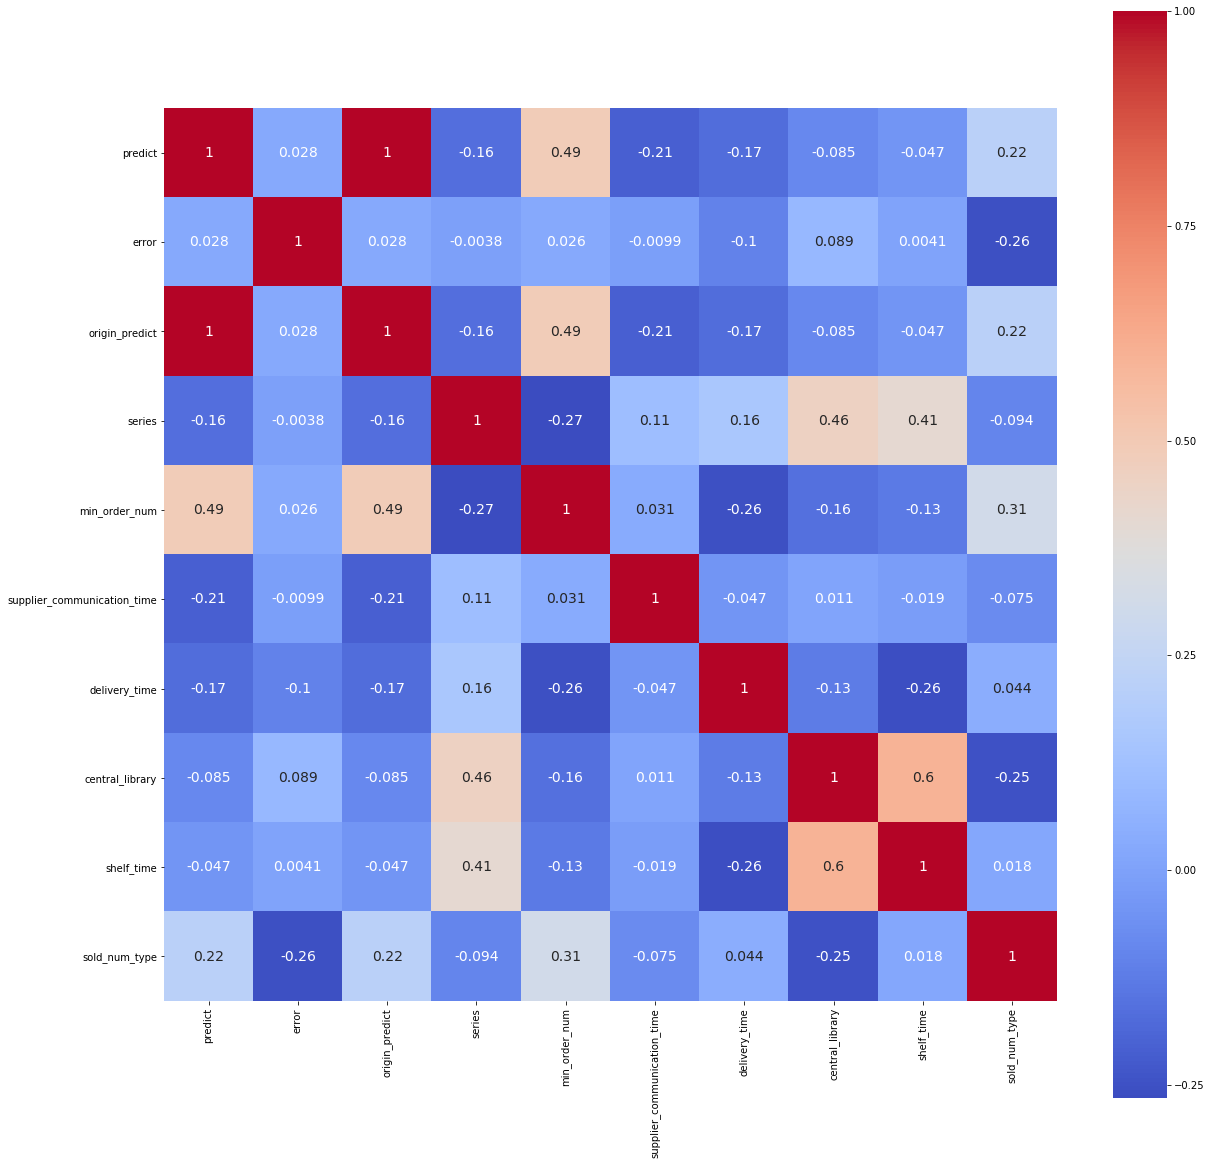

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.subplots(figsize=(20, 20))

sns.heatmap(all_data.drop(['part_name'], axis=1).corr(), annot=True, square=True, cmap='coolwarm',
            annot_kws={'size': 14})

plt.show()

In [134]:
all_data['month'] = all_data.apply(lambda x: x.date.month, axis=1)

In [135]:
drop_columns = ['date', 'predict', 'part_nm_chn', 'is_new', 'SC', 'DC']
all_data.drop(drop_columns, axis=1, inplace=True)
all_data.head()

,part_name,error,origin_predict,part_class_name,part_type,acc,series,vehicle,part_flow_abc,part_price_abc,supplier_type,min_order_num,supplier_communication_time,delivery_time,central_library,shelf_time,order_frequency,delivery_frequency,sold_num_type,month
0,40165801521-999,0.243590,96.893944,非易损件,MEDIUM,N,28,新奇骏,GL-S-E,GL-C-I,海外,1,3,39,4180,1,D,D,6,5
1,411350JN30A-999,0.081081,68.067413,非易损件,MEDIUM,N,8,天籁,GL-S-E,GL-C-D,海外,1,3,48,4181,1,D,D,5,5
2,411720JD00C-999,0.230769,48.009594,一般易损件,MEDIUM,N,7,逍客,GL-S-E,GL-C-E,海外,1,3,48,4181,1,D,D,4,5
3,411720JG30B-999,0.079646,104.456207,一般易损件,MEDIUM,N,9,奇骏,GL-S-D,GL-C-E,海外,1,3,48,4181,1,D,D,7,5
4,411950JN30A-999,0.125000,70.469727,常用易损件,MEDIUM,N,8,天籁,GL-S-E,GL-C-F,海外,1,3,48,4181,1,D,D,5,5


In [136]:
part_df = part_data.loc[:, ['part_name']]
part_dict = part_df.to_dict()['part_name']
part_df['part_no'] = part_df.index
part_dict_f = part_df.set_index(['part_name'])['part_no'].to_dict()
part_dict

{0L: u'40165801521-999',
 1L: u'411350JN30A-999',
 2L: u'411720JD00C-999',
 3L: u'411720JG30B-999',
 4L: u'411950JN30A-999',
 5L: u'4147355RF0A-B010',
 6L: u'41520800Q1E-999',
 7L: u'4152089E01A-999',
 8L: u'4165461LK0E-999',
 9L: u'4165463KY0B-999',
 10L: u'4180022FJ0A-B145',
 11L: u'420651JG30A-999',
 12L: u'4214001DA0A-B010',
 13L: u'4214104CL0A-B010',
 14L: u'421460CJ00A-B010',
 15L: u'421460EW80A-B010',
 16L: u'42160650X0B-C190',
 17L: u'421710ED000-999',
 18L: u'422401JA01B-999',
 19L: u'422401JD01B-999',
 20L: u'4226A03BR0A-999',
 21L: u'4240113RA0B-B119',
 22L: u'4240114CL0B-B119',
 23L: u'4240114CL1A-B119',
 24L: u'4240115MD0A-B119',
 25L: u'4240115MD3A-B119',
 26L: u'4240116FV1A-B119',
 27L: u'4240117FK1A-B119',
 28L: u'4240124CL0B-B119',
 29L: u'4240126FV2A-B119',
 30L: u'4240144CL0A-B119',
 31L: u'424014DF30B-B119',
 32L: u'4240234CL0B-B119',
 33L: u'4240236FV1C-B119',
 34L: u'4240236FV1D-B119',
 35L: u'424023DF30B-B119',
 36L: u'424023DF30D-B119',
 37L: u'4240336FV1A-B119'

In [137]:
all_data['part_name'].replace(part_dict_f, inplace=True)
all_data.head()

,part_name,error,origin_predict,part_class_name,part_type,acc,series,vehicle,part_flow_abc,part_price_abc,supplier_type,min_order_num,supplier_communication_time,delivery_time,central_library,shelf_time,order_frequency,delivery_frequency,sold_num_type,month
0,0,0.243590,96.893944,非易损件,MEDIUM,N,28,新奇骏,GL-S-E,GL-C-I,海外,1,3,39,4180,1,D,D,6,5
1,1,0.081081,68.067413,非易损件,MEDIUM,N,8,天籁,GL-S-E,GL-C-D,海外,1,3,48,4181,1,D,D,5,5
2,2,0.230769,48.009594,一般易损件,MEDIUM,N,7,逍客,GL-S-E,GL-C-E,海外,1,3,48,4181,1,D,D,4,5
3,3,0.079646,104.456207,一般易损件,MEDIUM,N,9,奇骏,GL-S-D,GL-C-E,海外,1,3,48,4181,1,D,D,7,5
4,4,0.125000,70.469727,常用易损件,MEDIUM,N,8,天籁,GL-S-E,GL-C-F,海外,1,3,48,4181,1,D,D,5,5


In [ ]:
one_hot_feature = ['part_class_name', 'part_typpe', 'acc', 
                   'vehicle', 'part_flow_abc', 'part_price_abc', 'supplier_type', 
                   'order_frequency', 'delivery_frequency']